In [24]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

#TEST_IMAGE_DIR = "./dog-breed-identification/test/"
TRAIN_IMAGE_DIR = "./dog-breed-identification/train/"
LABELS = './dog-breed-identification/labels.csv'

data = pd.read_csv(LABELS)
class_names = data['breed'].unique()

print(data)

                                     id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]


In [25]:
#Data from the csv only contans the ids of the photos and not the photos itself
#Iterate through the data and check whether the photo is in test or train
#Then fetch it and store it in its proper variable
import tensorflow as tf
from os.path import join
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_and_preprocess_images(image_dir, image_ids, target_size=(28, 28)):
    image_data = []
    for img_id in image_ids:
        img_path = join(image_dir, img_id + ".jpg")
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        preprocessed_img = preprocess_input(img_array) #I dont flatten the image here
        image_data.append(preprocessed_img)
    return np.array(image_data)

# Get image IDs for train and test
train_image_ids = data['id'].values
labels = data['breed'].values
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

train_image_ids, test_image_ids, train_labels, test_labels = train_test_split(train_image_ids, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)

train_images = load_and_preprocess_images(TRAIN_IMAGE_DIR, train_image_ids)
test_images = load_and_preprocess_images(TRAIN_IMAGE_DIR, test_image_ids)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


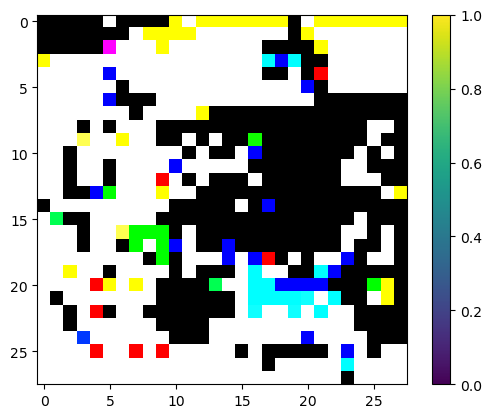

81


In [26]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[3])

In [27]:
train_images = train_images / 250.0
test_images = test_images / 250.0

In [38]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 3)), #input layer1
    keras.layers.Dense(300, activation='relu'), #hidden layer2
    keras.layers.Dense(120, activation='softmax') #output layer 4, output layer should be as many classes as we want to predict for
])

In [39]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
256/256 [==============================] - 1s 3ms/step - loss: 4.7197 - accuracy: 0.0285
Epoch 2/10
256/256 [==============================] - 1s 3ms/step - loss: 4.0384 - accuracy: 0.1124
Epoch 3/10
256/256 [==============================] - 1s 3ms/step - loss: 3.4756 - accuracy: 0.2238
Epoch 4/10
256/256 [==============================] - 1s 3ms/step - loss: 2.9067 - accuracy: 0.3434
Epoch 5/10
256/256 [==============================] - 1s 3ms/step - loss: 2.3638 - accuracy: 0.4788
Epoch 6/10
256/256 [==============================] - 1s 3ms/step - loss: 1.8653 - accuracy: 0.5897
Epoch 7/10
256/256 [==============================] - 1s 3ms/step - loss: 1.4057 - accuracy: 0.7058
Epoch 8/10
256/256 [==============================] - 1s 3ms/step - loss: 1.0361 - accuracy: 0.8008
Epoch 9/10
256/256 [==============================] - 1s 3ms/step - loss: 0.7394 - accuracy: 0.8696
Epoch 10/10
256/256 [==============================] - 1s 3ms/step - loss: 0.5236 - accuracy: 0.9198

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

64/64 - 0s - loss: 6.4812 - accuracy: 0.0440 - 90ms/epoch - 1ms/step

Test accuracy: 0.04400977864861488
